<a href="https://colab.research.google.com/github/RenanYMartins/ADD-Trabalho2/blob/main/Mercado_Imobili%C3%A1rio_de_Nova_York_Trabalho2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Avaliativa II - Classificação e Regressão
# Base Mercado Imobiliário de Nova York

## Setup Inicial

Importando bibliotecas e conectando à base de dados.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix,
    mean_squared_error
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
df = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Trabalho I/data/07_mercado_imobiliário_ny.csv')

## Visão Inicial dos Dados

In [53]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


Vemos que os dados representam imóveis à venda disponíveis em Nova Iorque, com as seguintes propriedades:

- `BROKERTITLE`: Título do corretor.
- `TYPE`: Tipo do imóvel.
- `PRICE`: Preço do imóvel.
- `BEDS`: Número de quartos.
- `BATH`: Número de banheiros.
- `PROPERTYSQFT`: Área em $\mathrm{m}^2$.
- `ADDRESS`: Endereço completo.
- `STATE`: Estado (NY).
- `MAIN_ADDRESS`: Endereço principal.
- `ADMINISTRATIVE_AREA_LEVEL_2`: Área administrativa secundária.
- `LOCALITY`: Localidade.
- `SUBLOCALITY`: Sublocalidade.
- `STREET_NAME`: Nome da rua.
- `LONG_NAME`: Nome completo da localização.
- `FORMATTED_ADDRESS`: Endereço formatado.
- `LATITUDE`: Latitude geográfica.
- `LONGITUDE`: Longitude geográfica.

In [54]:
df.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})

,Variável,Quantidade de Nulos
0,BROKERTITLE,0
1,TYPE,0
2,PRICE,0
3,BEDS,0
4,BATH,0
5,PROPERTYSQFT,0
6,ADDRESS,0
7,STATE,0
8,MAIN_ADDRESS,0
9,ADMINISTRATIVE_AREA_LEVEL_2,0


Vamos remover os dados duplicados, mantendo apenas uma instância de cada um deles.

In [55]:
df_filtered = df.drop_duplicates()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4587 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4587 non-null   object 
 1   TYPE                         4587 non-null   object 
 2   PRICE                        4587 non-null   int64  
 3   BEDS                         4587 non-null   int64  
 4   BATH                         4587 non-null   float64
 5   PROPERTYSQFT                 4587 non-null   float64
 6   ADDRESS                      4587 non-null   object 
 7   STATE                        4587 non-null   object 
 8   MAIN_ADDRESS                 4587 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4587 non-null   object 
 10  LOCALITY                     4587 non-null   object 
 11  SUBLOCALITY                  4587 non-null   object 
 12  STREET_NAME                  4587 non-null   object 
 13  LONG_NAME              

### Limpeza outlier com valor de U$2 bilhões.

In [56]:
df_filtered = df_filtered[df_filtered['PRICE'] != 2147483647]

# Classificação e Regressão
### Como já foi realizado uma análise prévia da base anteriormente, agora analisaremos a base com alguns algoritmos de classificação e regressão.

### Preparando os dados

In [66]:
X = df_filtered[['BEDS', 'BATH', 'PROPERTYSQFT']]
y = df_filtered['PRICE']

### Criação coluna County para melhor agrupamento das regiões de NY

In [58]:
def map_to_county(sublocality):
    if pd.isna(sublocality):
        return None

    name = sublocality.lower()

    if any(k in name for k in ['manhattan', 'new york county', 'upper east', 'upper west', 'midtown', 'harlem', 'soho', 'tribeca', 'financial district']):
        return 'New York'
    elif any(k in name for k in ['brooklyn', 'kings county', 'fort hamilton', 'bay ridge', 'dyker heights', 'bensonhurst', 'flatbush', 'bushwick', 'williamsburg', 'park slope', 'coney island', 'bedford-stuyvesant']):
        return 'Kings'
    elif any(k in name for k in ['queens', 'queens county', 'flushing', 'jamaica', 'astoria', 'long island city', 'forest hills', 'rego park', 'far rockaway']):
        return 'Queens'
    elif any(k in name for k in ['bronx', 'bronx county', 'east bronx', 'west bronx', 'mott haven', 'fordham', 'riverdale', 'pelham bay', 'throggs neck', 'co-op city']):
        return 'Bronx'
    elif any(k in name for k in ['staten island', 'richmond county', 'st. george', 'tottenville', 'great kills', 'new dorp', 'stapleton']):
        return 'Richmond'
    else:
        return 'Outros'

df_filtered['COUNTY'] = df_filtered['SUBLOCALITY'].apply(map_to_county)

### Separação de dados de treino e teste


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
def evaluate_model(y_true, y_pred, nome="Modelo"):
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f"{nome} - RMSE: {rmse:.2f}")

## Algoritmos de Regressão

### Regressão Linear

In [69]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

pred_lr = model_lr.predict(X_test)
evaluate_model(y_test, pred_lr, "Regressão Linear")

Regressão Linear - RMSE: 3481398.77


### Árvore de Regressão

In [70]:
model_tree = DecisionTreeRegressor(random_state = 42)
model_tree.fit(X_train, y_train)

pred_tree = model_tree.predict(X_test)
evaluate_model(y_test, pred_tree, "Árvore de Regressão")

Árvore de Regressão - RMSE: 7678815.90


### Random Forest Regressor

In [71]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model_rf.fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
evaluate_model(y_test, pred_rf, "Random Forest")

Random Forest - RMSE: 4663251.27


### Support Vector Regressor (SVR)

In [72]:
model_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, epsilon=0.1))
model_svr.fit(X_train, y_train)

pred_svr = model_svr.predict(X_test)
evaluate_model(y_test, pred_svr, "SVR")

SVR - RMSE: 4201696.20


## Comparação entre os modelos

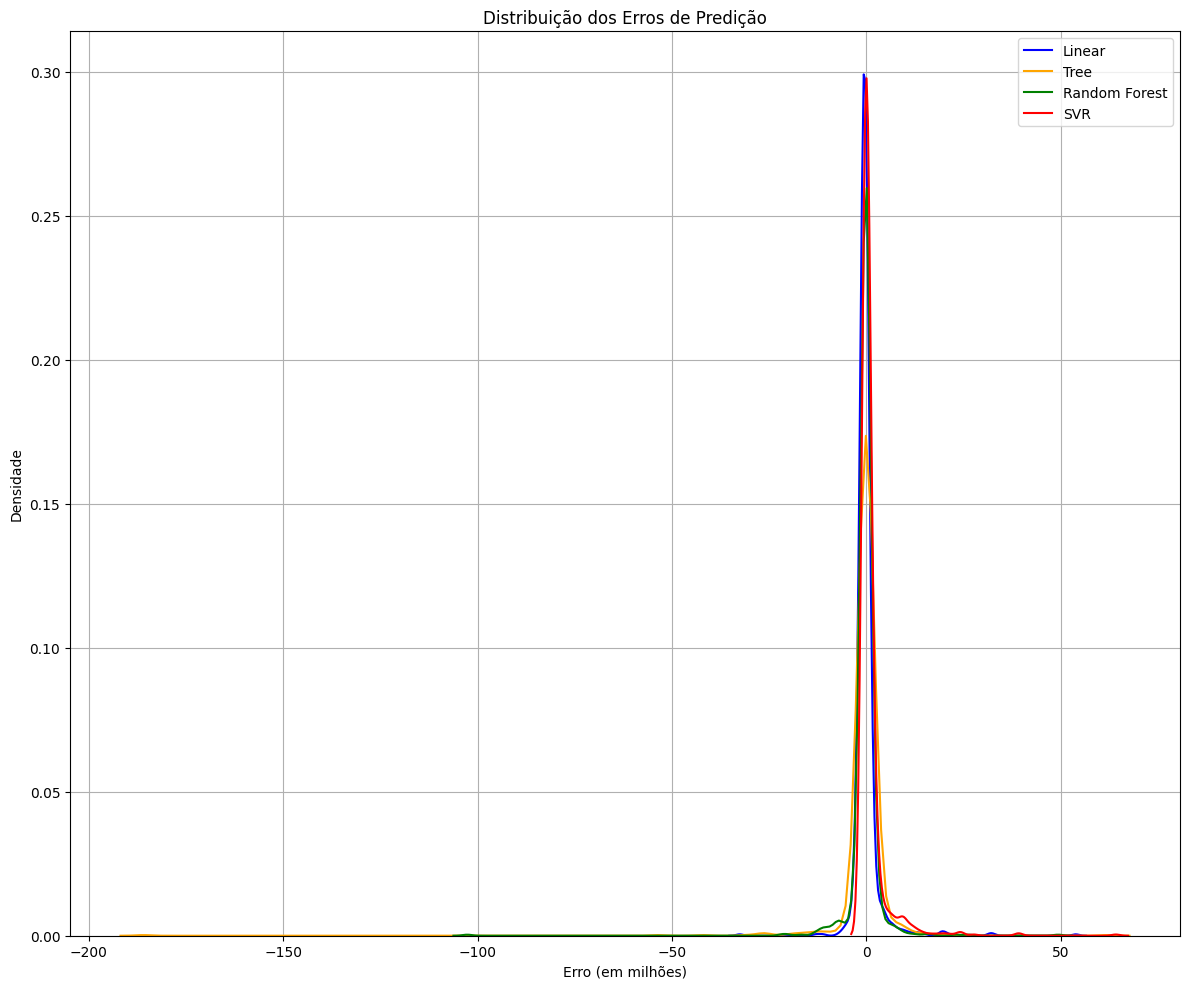

In [73]:
divisor = 1e6

plt.figure(figsize=(12, 10))
sns.kdeplot((y_test - pred_lr) / divisor, label="Linear", color='blue')
sns.kdeplot((y_test - pred_tree) / divisor, label="Tree", color='orange')
sns.kdeplot((y_test - pred_rf) / divisor, label="Random Forest", color='green')
sns.kdeplot((y_test - pred_svr) / divisor, label="SVR", color='red')

plt.title("Distribuição dos Erros de Predição")
plt.xlabel("Erro (em milhões)")
plt.ylabel("Densidade")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusão
### Com base no gráfico acima, é possível observar que os modelos tiveram resultados muito semelhantes nas predições. Os erros estão próximos de zero, com base no gráfico, indicando que as precições estão próximas do valor real. As caudas longas indicam que há grandes distorçoes em alguns resultados, possivelmente causados pela quantidade de outliers na base.

## Algoritmos de Classificação
### Para essa análise, será utilizada a base de desempenho estudantil.

In [4]:
df_grades = pd.read_csv('/content/drive/MyDrive/Análise de Dados/Trabalho I/data/03_desempenho_estudantil.csv')

In [ ]:
## Visão inicial dos dados

In [6]:
df_grades.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [19]:
df_grades.isnull().sum().reset_index().rename(columns={0: "Quantidade de Nulos", "index": "Variável"})


,Variável,Quantidade de Nulos
0,Hours_Studied,0
1,Attendance,0
2,Parental_Involvement,0
3,Access_to_Resources,0
4,Extracurricular_Activities,0
5,Sleep_Hours,0
6,Previous_Scores,0
7,Motivation_Level,0
8,Internet_Access,0
9,Tutoring_Sessions,0


In [10]:
df_grades.count()

,0
Hours_Studied,6607
Attendance,6607
Parental_Involvement,6607
Access_to_Resources,6607
Extracurricular_Activities,6607
Sleep_Hours,6607
Previous_Scores,6607
Motivation_Level,6607
Internet_Access,6607
Tutoring_Sessions,6607


In [18]:
# Remoção dos valores nulos
df_grades.dropna(inplace=True)

In [21]:
# Limpeza de dados duplicados
df_grades_filtered = df_grades.drop_duplicates()
df_grades_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1